In [ ]:
!pip3 install openpyxl seaborn scikit-learn statsmodels
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku
df = pd.read_csv('../cw3/daneZ3_zad1.csv', sep=';', decimal=',', encoding='ISO-8859-2')

# Podstawowe statystyki opisowe
print(df.describe())

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
               x1          x2             x3
count  112.000000  112.000000     112.000000
mean    -0.003271   -8.832136  108860.729464
std      1.104670    5.235897   69679.890920
min     -2.516224  -18.527997   15187.600000
25%     -0.685180  -13.321795   42609.825000
50%      0.000854   -9.958758  102741.600000
75%      0.766425   -4.002023  168050.000000
max      2.388110    0.943213  228722.900000


ValueError: time data "sty 10" doesn't match format "%b %y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

# Zadanie 1
### 1.1
Utworzyć wykresy dla zamieszczonych w pliku szeregów czasowych. Czy na podstawie wykresów można przypuszczać, że szeregi te są stacjonarne?

**Na podstawie wykresów można przypuszczać, że tylko szeregi x2 i x3 są stacjonarne.**

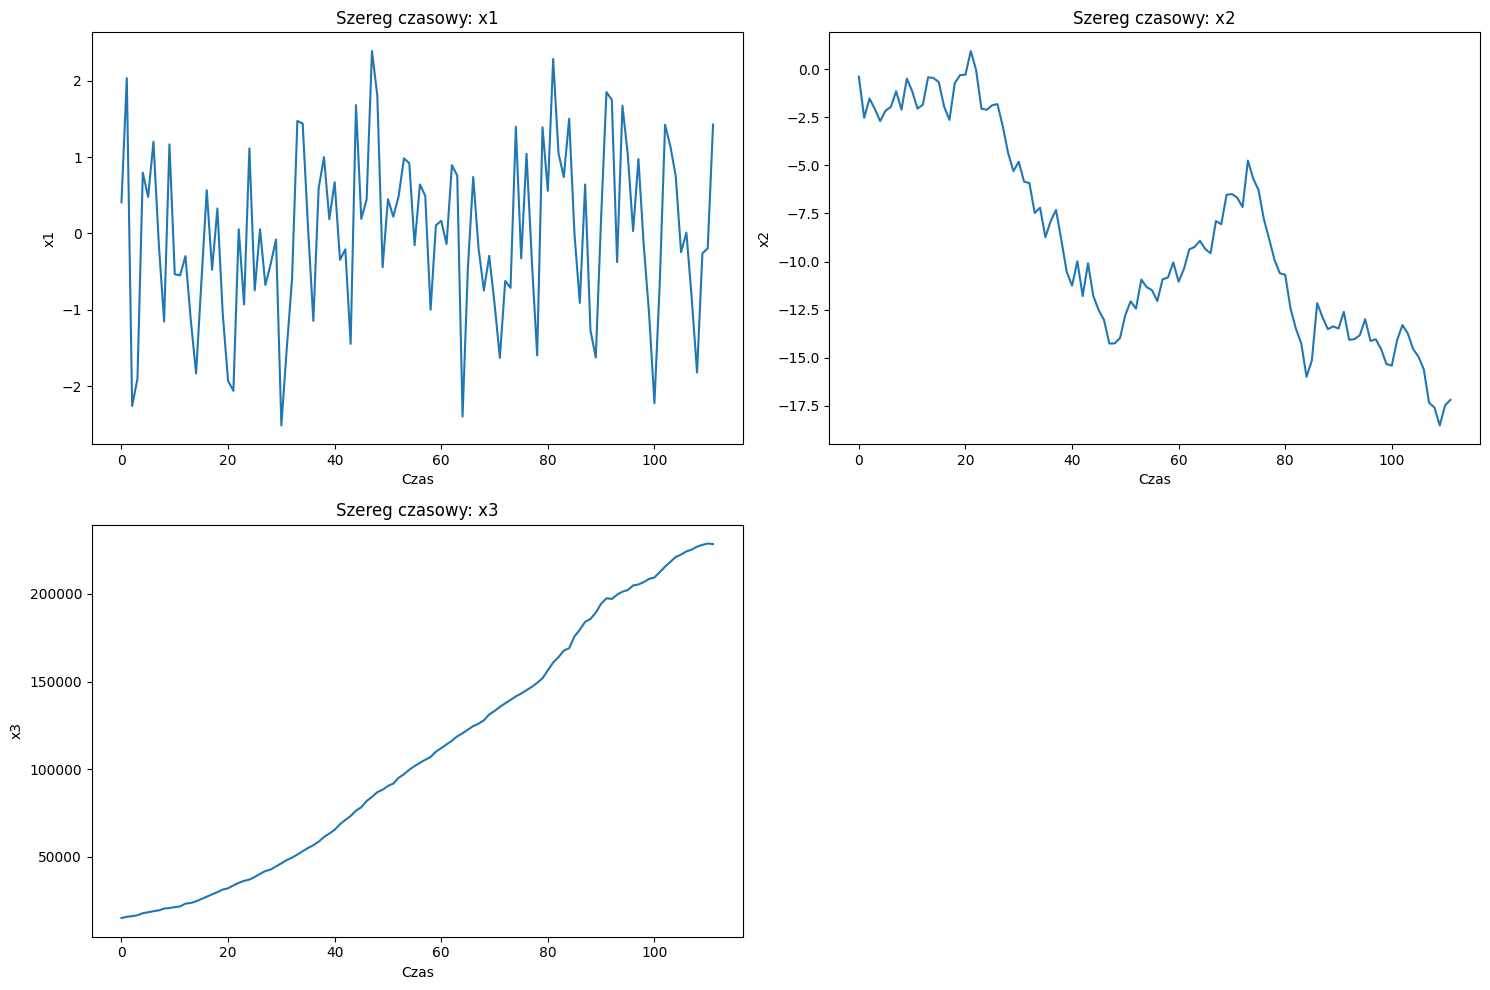

In [10]:
# Wykresy dla każdego szeregu czasowego
plt.figure(figsize=(15, 10))

for idx, col in enumerate(df.columns[1:]):
    plt.subplot(2, 2, idx + 1)
    plt.plot(df[col])
    plt.title(f'Szereg czasowy: {col}')
    plt.xlabel('Czas')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### 1.1
ADF (Augmented Dickey-Fuller) - sprawdza, czy w szeregach jest jednostkowy pierwiastek (czyli czy jest niestacjonarny).
KPSS - sprawdza, czy szeregi są stacjonarne wokół trendu.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Funkcja do przeprowadzenia testów
def test_stationarity(series, series_name):
    print(f'\n\nWyniki dla szeregu: {series_name}')

    # Test ADF
    adf_result = adfuller(series)
    print(f'Test ADF')
    print(f'Statystyka testowa: {adf_result[0]}')
    print(f'P-wartość: {adf_result[1]}')
    print(f'Liczba opóźnień: {adf_result[2]}')
    print(f'Liczba obserwacji: {adf_result[3]}')
    if adf_result[1] < 0.05:
        print('Wniosek: Odrzucamy hipotezę zerow - szereg jest stacjonarny.')
    else:
        print('Wniosek: Brak podstaw do odrzucenia hipotezy zerowej - szereg jest niestacjonarny.')

    # Test KPSS
    try:
        kpss_result, p_value, lags, crit = kpss(series, regression='c', nlags="auto")
        print(f'\nTest KPSS')
        print(f'Statystyka testowa: {kpss_result}')
        print(f'P-wartość: {p_value}')
        print(f'Liczba opóźnień: {lags}')
        if p_value < 0.05:
            print('Wniosek: Odrzucamy hipotezę zerową - szereg NIE jest stacjonarny.')
        else:
            print('Wniosek: Brak podstaw do odrzucenia hipotezy zerowej - szereg jest stacjonarny.')
    except Exception as e:
        print(f'Błąd w teście KPSS: {e}')

# Przeprowadzenie testów dla wszystkich kolumn z danymi
for col in df.columns[1:]:
    test_stationarity(df[col], col)




Wyniki dla szeregu: x1
Test ADF
Statystyka testowa: -8.117874358120739
P-wartość: 1.1775528071625125e-12
Liczba opóźnień: 0
Liczba obserwacji: 111
Wniosek: Odrzucamy hipotezę zerow - szereg jest stacjonarny.

Test KPSS
Statystyka testowa: 0.24708901437194614
P-wartość: 0.1
Liczba opóźnień: 2
Wniosek: Brak podstaw do odrzucenia hipotezy zerowej - szereg jest stacjonarny.


Wyniki dla szeregu: x2
Test ADF
Statystyka testowa: -1.0420567531577423
P-wartość: 0.7376178144134037
Liczba opóźnień: 0
Liczba obserwacji: 111
Wniosek: Brak podstaw do odrzucenia hipotezy zerowej - szereg jest niestacjonarny.

Test KPSS
Statystyka testowa: 1.2882008321541558
P-wartość: 0.01
Liczba opóźnień: 6
Wniosek: Odrzucamy hipotezę zerową - szereg NIE jest stacjonarny.


Wyniki dla szeregu: x3
Test ADF
Statystyka testowa: -0.07980786729461394
P-wartość: 0.9514129766114758
Liczba opóźnień: 7
Liczba obserwacji: 104
Wniosek: Brak podstaw do odrzucenia hipotezy zerowej - szereg jest niestacjonarny.

Test KPSS
Stat

/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_46975/3008109293.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result, p_value, lags, crit = kpss(series, regression='c', nlags="auto")
/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_46975/3008109293.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result, p_value, lags, crit = kpss(series, regression='c', nlags="auto")
/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_46975/3008109293.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result, p_value, lags, crit = kpss(series, regression='c', nlags="auto")


Z przeprowadzonych testów wychodzi, że drugi i trzeci szereg nie są stacjonarne.

### 1.3
Za pomocą różnicowania wyeliminować niestacjonarność z szeregów czasowych. Nowe szeregi przedstawić na wykresach oraz przeprowadzić na nich testy na stacjonarność. Skomentować uzyskane wyniki.

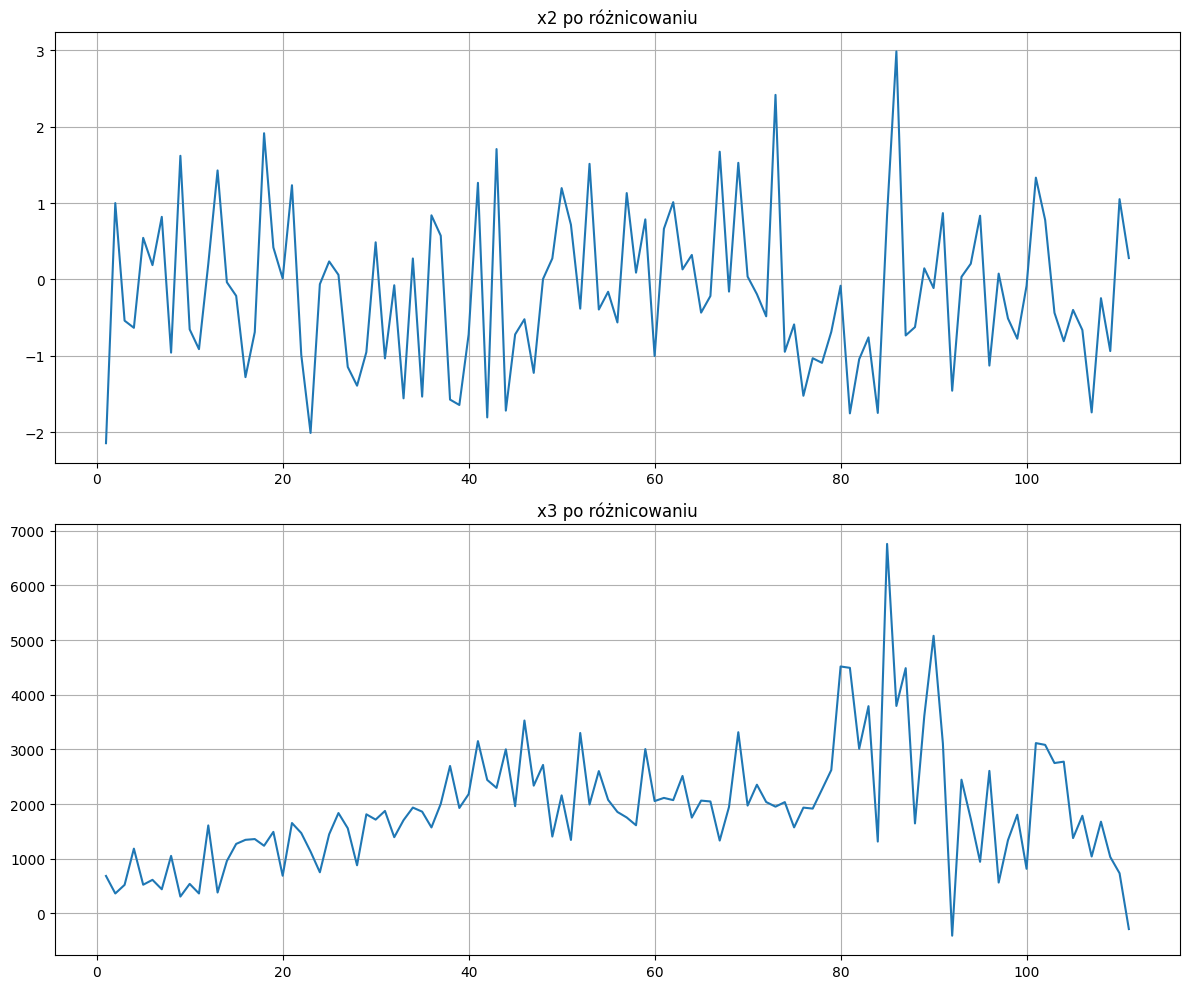

x2
ADF p-value: 0.0000
KPSS p-value: 0.1000

x3
ADF p-value: 0.1290
KPSS p-value: 0.0144



/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_46975/2059694857.py:25: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c')


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# Lista kolumn do różnicowania (tylko x2 i x3)
columns_to_diff = ['x2', 'x3']

# Różnicowanie
df_diff = df[columns_to_diff].diff().dropna()

# Wykresy różnicowanych szeregów
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
for i, col in enumerate(columns_to_diff):
    axes[i].plot(df_diff[col])
    axes[i].set_title(f'{col} po różnicowaniu')
    axes[i].grid(True)
plt.tight_layout()
plt.show()

# Funkcja do testów ADF i KPSS
def stationarity_tests(series, name):
    print(f'{name}')
    # ADF
    adf_result = adfuller(series)
    print(f'ADF p-value: {adf_result[1]:.4f}')
    # KPSS
    kpss_result = kpss(series, regression='c')
    print(f'KPSS p-value: {kpss_result[1]:.4f}')
    print('')

# Testy na nowych szeregach
for col in columns_to_diff:
    stationarity_tests(df_diff[col], col)

### 1.4
Ustalić stopień zintegrowania analizowanych szeregów czasowych

Dla szeregów x i y1 stopień zintegrowania d=1 (ponieważ trzeba przeprowadzić proces różnicowania jeden raz by szeregi były stacjonarne).

Dla szeregów y2 i y3 stopień zintegrowania d=0 (ponieważ szeregi już są stacjonarne).

In [24]:
# from statsmodels.tsa.stattools import adfuller, kpss

# # Funkcja do testów ADF i KPSS
# def stationarity_tests(series, name):
#     print(f'{name}')
#     # ADF
#     adf_result = adfuller(series)
#     print(f'ADF p-value: {adf_result[1]:.4f}')
#     # KPSS
#     kpss_result = kpss(series, regression='c')
#     print(f'KPSS p-value: {kpss_result[1]:.4f}')
#     print('')

# # Lista kolumn
# columns = ['x1', 'x2', 'x3']

# # Sprawdzanie stopnia zintegrowania
# for col in columns:
#     print(f'Analiza dla {col} (oryginalny szereg):')
#     stationarity_tests(df[col], col)

#     # Jeśli szereg nie jest stacjonarny, różnicowanie
#     if adfuller(df[col])[1] > 0.05:  # Sprawdzamy p-value z testu ADF
#         print(f'{col} nie jest stacjonarny, przeprowadzamy różnicowanie.')
#         df_diff = df[col].diff().dropna()
#         stationarity_tests(df_diff, f'{col} (po różnicowaniu)')
#     else:
#         print(f'{col} jest stacjonarny od razu.')

# Lista kolumn
columns = ['x1', 'x2', 'x3']

# Sprawdzanie stopnia zintegrowania
for col in columns:
    print(f'Analiza dla {col} (oryginalny szereg):')
    stationarity_tests(df[col], col)

    # Inicjalizujemy zmienną do liczenia stopnia zintegrowania
    integration_degree = 0
    series = df[col]
    
    # Dopóki szereg nie jest stacjonarny, różnicujemy
    while adfuller(series)[1] > 0.05:
        print(f'{col} nie jest stacjonarny, przeprowadzamy różnicowanie.')
        series = series.diff().dropna()
        integration_degree += 1
        stationarity_tests(series, f'{col} (po różnicowaniu {integration_degree})')

    print(f'{col} stał się stacjonarny po {integration_degree} różnicowaniach.')

Analiza dla x1 (oryginalny szereg):
x1
ADF p-value: 0.0000
KPSS p-value: 0.1000

x1 stał się stacjonarny po 0 różnicowaniach.
Analiza dla x2 (oryginalny szereg):
x2
ADF p-value: 0.7376
KPSS p-value: 0.0100

x2 nie jest stacjonarny, przeprowadzamy różnicowanie.
x2 (po różnicowaniu 1)
ADF p-value: 0.0000
KPSS p-value: 0.1000

x2 stał się stacjonarny po 1 różnicowaniach.
Analiza dla x3 (oryginalny szereg):
x3
ADF p-value: 0.9514
KPSS p-value: 0.0100

x3 nie jest stacjonarny, przeprowadzamy różnicowanie.
x3 (po różnicowaniu 1)
ADF p-value: 0.1290
KPSS p-value: 0.0144

x3 nie jest stacjonarny, przeprowadzamy różnicowanie.
x3 (po różnicowaniu 2)
ADF p-value: 0.0000
KPSS p-value: 0.1000

x3 stał się stacjonarny po 2 różnicowaniach.


/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_46975/3421936046.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c')
/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_46975/3421936046.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')
/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_46975/3421936046.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c')
/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_46975/3421936046.py:10: InterpolationWarning: The test s

Stopień zintegrowania dla
x1 - 0 (już był stacjonarny)
x2 - 1
x3 - 2